## import libraries

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load the dataset

In [65]:
df = pd.read_csv("data/imdb_movie_data_2023.csv")

df.head(5)

,Unnamed: 0,Moive Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
0,0,Leave the World Behind,6.5,90000.0,67.0,"Drama, Mystery, Thriller",R,2023,2h 18m,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Sam Esmail
1,1,Wonka,7.4,24000.0,66.0,"Adventure, Comedy, Family",PG,2023,1h 56m,"Timothée Chalamet, Gustave Die, Murray McArthu...",Paul King
2,2,Poor Things,8.5,6700.0,86.0,"Comedy, Drama, Romance",R,2023,2h 21m,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos
3,3,Killers of the Flower Moon,7.8,128000.0,89.0,"Crime, Drama, History",R,2023,3h 26m,"Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Martin Scorsese
4,4,May December,7.0,21000.0,85.0,"Comedy, Drama",R,2023,1h 57m,"Natalie Portman, Chris Tenzis, Charles Melton,...",Todd Haynes


In [66]:
df.columns

Index(['Unnamed: 0', 'Moive Name', 'Rating', 'Votes', 'Meta Score', 'Genre',
       'PG Rating', 'Year', 'Duration', 'Cast', 'Director'],
      dtype='object')

In [67]:
df.info()

df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1950 non-null   int64  
 1   Moive Name  1950 non-null   object 
 2   Rating      1944 non-null   float64
 3   Votes       1944 non-null   float64
 4   Meta Score  1833 non-null   float64
 5   Genre       1833 non-null   object 
 6   PG Rating   1874 non-null   object 
 7   Year        1950 non-null   int64  
 8   Duration    1948 non-null   object 
 9   Cast        1833 non-null   object 
 10  Director    1833 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 167.7+ KB


(1950, 11)

Columns that look useful:
* Movie Name, Rating, Genre, PG Rating, Year, Director

From the above info, I could try to figure out:
* Trends in movie genres by year/decade
* Which Directors are the most prolific/acclaimed
* Duration v. Popularity

## data cleaning

In [68]:
#The Unnamed:0 column simply numbers the movies based on how they were entered, so we no longer have need for it
df = df.drop("Unnamed: 0", axis = 1)
df.columns

Index(['Moive Name', 'Rating', 'Votes', 'Meta Score', 'Genre', 'PG Rating',
       'Year', 'Duration', 'Cast', 'Director'],
      dtype='object')

In [69]:
# The Cast column is a long list of actors, most of whom I don't really care about. It also doesn't relate to my findings so I dropped it
df = df.drop("Cast", axis = 1)
df.columns

Index(['Moive Name', 'Rating', 'Votes', 'Meta Score', 'Genre', 'PG Rating',
       'Year', 'Duration', 'Director'],
      dtype='object')

### What is the top movie genre of every year?

In [70]:
df["Genre"].isna().sum()

num_rows = df.shape[0]
missing_broker_rows = df["Genre"].isna().sum()
print(((missing_broker_rows)/num_rows)*100)

6.0


Only 6% of the data is missing, not enough to to get rid of the column. As I am just trying to find the mode of values, the 0 in Genre doesn't really affect anything.

In [71]:
df["Year"].isna().sum()

#determine percentage of missing values
num_rows = df.shape[0]
missing_broker_rows = df["Year"].isna().sum()
print(((missing_broker_rows)/num_rows)*100)

0.0


In [72]:
df["Genre"].mode()

0    Action, Adventure, Sci-Fi
Name: Genre, dtype: object

### Directors

In [73]:
df["Director"].mode()

0    Steven Spielberg
Name: Director, dtype: object

In [74]:
df_sp1 =df.query("Director == 'Steven Spielberg'") #alternate quotes
df_sp1['Rating'].mean()

7.584

Steven Spielbeg has directed the most movies, with an average rating of 7.584.

In [75]:
director_group = df.groupby('Director')
director_ratings = director_group['Rating'].mean()
highest_rated_director = director_ratings.idxmax()
highest_rating = director_ratings.mean()


Overall, the director(s) with the highest ratings are Beyoncé and Ed Burke with an average rating of 6.8.

##  Duration v Popularity

In [76]:
print(df["Meta Score"].median())
df["Rating"].median()

63.0


7.0

Text(0.5, 1.0, 'Meta Score v Rating')

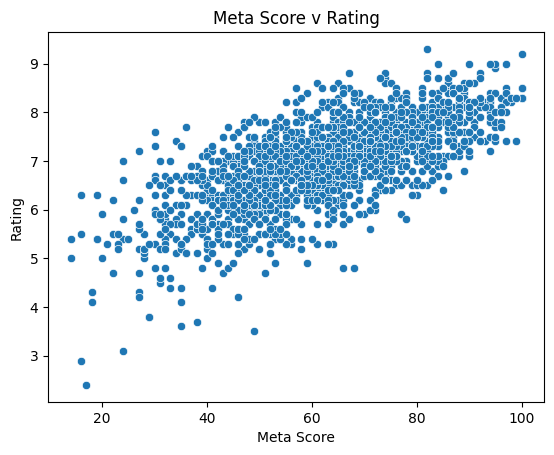

In [77]:
sns.scatterplot(data=df, x="Meta Score", y="Rating")

plt.title("Meta Score v Rating")

Text(0.5, 1.0, 'Meta Score v Votes')

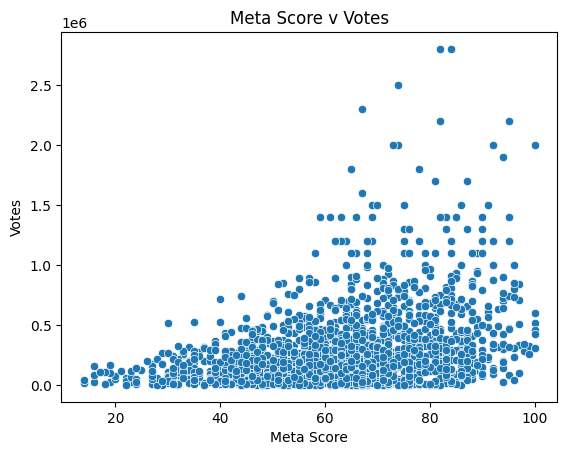

In [78]:
sns.scatterplot(data=df, x="Meta Score", y="Votes")

plt.title("Meta Score v Votes")